# Ford GoBike System Data
## by Abdelrahman Mohammed

## Preliminary Wrangling

> Data is obtained from the original website [here](https://s3.amazonaws.com/baywheels-data/202008-baywheels-tripdata.csv.zip)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Load Data
data = pd.read_csv("202008-baywheels-tripdata.csv")
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6549E11C13124B5F,electric_bike,2020-08-14 09:41:03,2020-08-14 10:03:45,NaN,NaN,Illinois St at 20th St,376.0,37.790000,-122.420000,37.760320,-122.387456,casual
1,B7F273BF69C8E4A3,electric_bike,2020-08-13 18:43:00,2020-08-13 18:52:52,NaN,NaN,24th St at Chattanooga St,132.0,37.750000,-122.410000,37.751798,-122.426539,casual
2,33B224625CF1BC63,electric_bike,2020-08-14 09:13:54,2020-08-14 09:20:29,23rd St at Tennessee St,355.0,Jackson Playground,115.0,37.755426,-122.388588,37.764950,-122.398857,casual
3,053D5F7D1AC11423,electric_bike,2020-08-14 11:26:54,2020-08-14 11:29:17,Broderick St at Oak St,71.0,Pierce St at Haight St,73.0,37.773053,-122.439103,37.771924,-122.433821,casual
4,B3BDECA79FF1C671,electric_bike,2020-08-14 08:37:37,2020-08-14 08:52:20,Broderick St at Oak St,71.0,NaN,NaN,37.773232,-122.439135,37.770000,-122.490000,casual


### Some basic investigation

In [3]:
#shape of data
data.shape

(152446, 13)

In [4]:
# Check Data types
data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [5]:
data.member_casual.unique()

array(['casual', 'member'], dtype=object)

In [6]:
data.rideable_type.unique()

array(['electric_bike', 'docked_bike'], dtype=object)

In [7]:
data.start_station_name.nunique()

449

In [8]:
data.end_station_name.nunique()

455

### Basic Preprocessing

I do some steps here: 

- Drop Unnecessary columns
- Change to pandas dateTime Format
- change columns names for the ease of use
- Derive new columns: Duration, Day_time, and hour

In [9]:
# Drop irrelevent columns
cols_drop = ['start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng']
data.drop(columns = cols_drop, inplace = True)
data.shape

(152446, 7)

In [10]:
# Transform th date time format
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])


In [11]:
# Change columns names for ease of use
cols = ['id', 'type', 'start_time', 'end_time', 'start_station', 'end_station', 'member']
data.columns = cols

In [12]:
data.dtypes

id                       object
type                     object
start_time       datetime64[ns]
end_time         datetime64[ns]
start_station            object
end_station              object
member                   object
dtype: object

In [13]:
# Derive Duration column
duration = pd.DatetimeIndex(data['end_time'] - data['start_time'])
data['duration'] = (duration.hour * 60 + duration.minute).astype(int)


/home/abdelrahman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  


In [14]:
def day_time(hr):
    if hr > 6 and hr < 12:
        return "Morning"
    if hr >= 12 and hr < 18:
        return "Afternoon"
    if hr >= 18 and hr < 24:
        return "Evening"
    if hr < 6:
        return "After-mid"

data['day_time'] = data.start_time.dt.hour.apply(day_time)

In [15]:
data['hour'] = data.start_time.dt.hour.astype(int)

In [16]:
data.head()

,id,type,start_time,end_time,start_station,end_station,member,duration,day_time,hour
0,6549E11C13124B5F,electric_bike,2020-08-14 09:41:03,2020-08-14 10:03:45,NaN,Illinois St at 20th St,casual,22,Morning,9
1,B7F273BF69C8E4A3,electric_bike,2020-08-13 18:43:00,2020-08-13 18:52:52,NaN,24th St at Chattanooga St,casual,9,Evening,18
2,33B224625CF1BC63,electric_bike,2020-08-14 09:13:54,2020-08-14 09:20:29,23rd St at Tennessee St,Jackson Playground,casual,6,Morning,9
3,053D5F7D1AC11423,electric_bike,2020-08-14 11:26:54,2020-08-14 11:29:17,Broderick St at Oak St,Pierce St at Haight St,casual,2,Morning,11
4,B3BDECA79FF1C671,electric_bike,2020-08-14 08:37:37,2020-08-14 08:52:20,Broderick St at Oak St,NaN,casual,14,Morning,8


In [17]:
# info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152446 entries, 0 to 152445
Data columns (total 10 columns):
id               152446 non-null object
type             152446 non-null object
start_time       152446 non-null datetime64[ns]
end_time         152446 non-null datetime64[ns]
start_station    104206 non-null object
end_station      101349 non-null object
member           152446 non-null object
duration         152446 non-null int64
day_time         150430 non-null object
hour             152446 non-null int64
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 11.6+ MB


In [18]:
# Remove rows with nan values
data.dropna(inplace = True)
data.shape

(84114, 10)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84114 entries, 2 to 152445
Data columns (total 10 columns):
id               84114 non-null object
type             84114 non-null object
start_time       84114 non-null datetime64[ns]
end_time         84114 non-null datetime64[ns]
start_station    84114 non-null object
end_station      84114 non-null object
member           84114 non-null object
duration         84114 non-null int64
day_time         84114 non-null object
hour             84114 non-null int64
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 7.1+ MB


In [41]:
# Save Data after preprocessing to use it in the presentation
data.to_csv("data_presentation.csv", index = False)

### What is the structure of your dataset?

Data is originally composed of 152446 rows and  13 columns. I drop 'start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng' since they are irrelevent to my investigation. Moreover, I drop all the null values. Thus, I am left with 84114 rows and , 7 columns. Finally I derive duration of the trip from hte start and end time of the trip and the day time from the start time and add column hour which is the hour at which the bike is rented. Hence, the main features are 

- id of trip
- type of bike (electric/docked)
- start time of the trip
- end time of the trip
- start station
- End station
- duration of trip
- day time
- hour

### What is/are the main feature(s) of interest in your dataset?

I am mainly interested in which bike types are more likely to be rented, Trip Durations, and types of users

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Duration, bike types, start and end stations and members

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

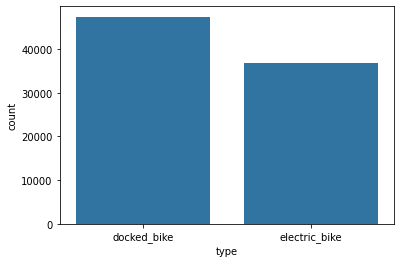

In [20]:
bike_types_counts = data.type.value_counts().index
base_color = sb.color_palette()[0]
ax = sb.countplot(data = data, x = 'type', order = bike_types_counts, color = base_color)

The counts of electric bikes used in the data is less than the the docked bikes

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

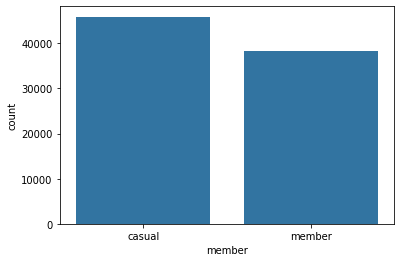

In [21]:
members_types = data.member.value_counts().index
base_color = sb.color_palette()[0]
ax = sb.countplot(data = data, x = 'member', order = members_types, color = base_color)

Casual members are more likely to use the bikes than the registered ones (members)

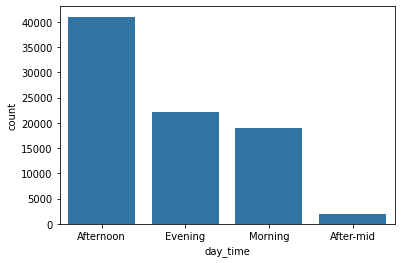

In [22]:
day_time_counts = data.day_time.value_counts().index
base_color = sb.color_palette()[0]
ax = sb.countplot(data = data, x = 'day_time', order = day_time_counts, color = base_color)

As Expected, the day time at which the bikes are used is Afternoon, then Evening. while After midnight is the lowest

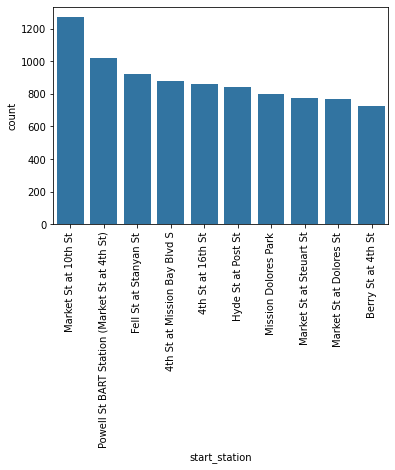

In [23]:
top_start_station = data.start_station.value_counts().index[:10]
base_color = sb.color_palette()[0]
ax = sb.countplot(data = data, x = 'start_station', order = top_start_station, color = base_color);
plt.xticks(rotation = 90);

Here I extract the 10 most frequent starting points from which bikes are used

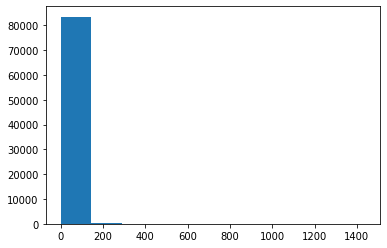

In [24]:
# Get intuition about the distribution of durations
plt.hist(data = data, x = 'duration');

Most of trips durations are at the interval [0, 100] mins

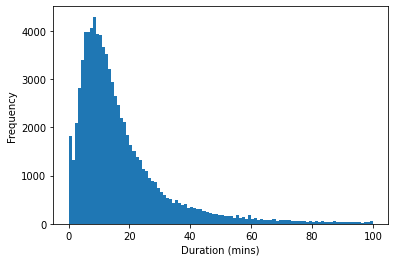

In [25]:
# Zoom in desired interval
bins = np.arange(0, 101, 1) # step = 1 min since duration is in minutes, no fractions!
plt.hist(data = data, x = 'duration', bins = bins);
plt.xlabel("Duration (mins)");
plt.ylabel("Frequency");

In [26]:
data.duration.describe()

count    84114.000000
mean        20.316975
std         53.396821
min          0.000000
25%          7.000000
50%         12.000000
75%         21.000000
max       1439.000000
Name: duration, dtype: float64

Distribution is unimodal with the mode at nearly 12 minutes!

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Bikes are mostly used at Afternoon and Evening

> The distribution of the duration histogram is unimodal with the mode at 12

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> They were almost as I expected, only the casual members number was what unexpected!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

/home/abdelrahman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


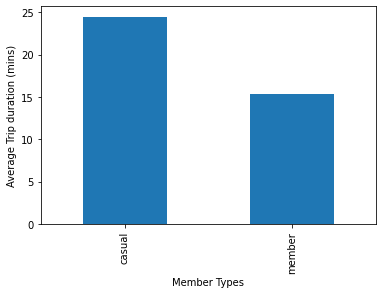

In [27]:
dist = data.groupby('member').duration.mean().plot('bar');
plt.ylabel("Average Trip duration (mins)");
plt.xlabel("Member Types");

Again, Casual members are more likely to use the service. The Average trip duration is higher form them than those registered members

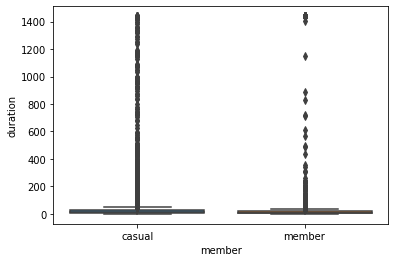

In [29]:
sb.boxplot(data = data, x = 'member', y = 'duration');

The box plot is not clear, I will zoom in the interval at which duration is less than 100

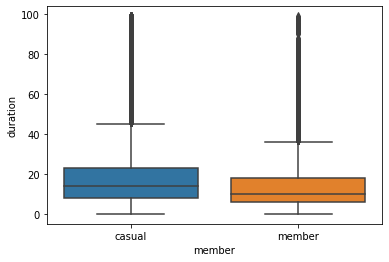

In [30]:
data_sub = data[data.duration < 100]
sb.boxplot(data = data_sub, x = 'member', y = 'duration');

Same Result obtained before! 

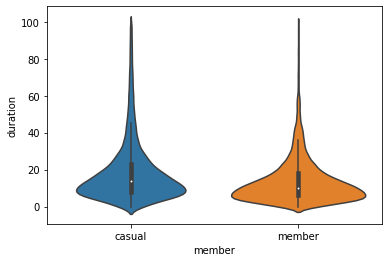

In [31]:
data_sub = data[data.duration < 100]
sb.violinplot(data = data_sub, x = 'member', y = 'duration');

This violin plot gives an explanation for why average trip duration is higher for casual users. Despite the plot is wider for registered members (more trips), they are concentrated at < 20 mins.

/home/abdelrahman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


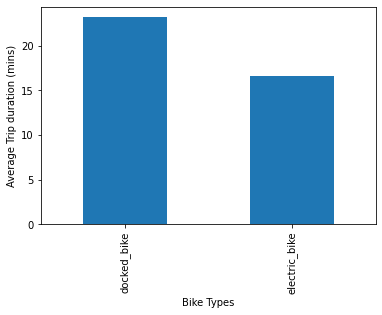

In [32]:
dist = data.groupby('type').duration.mean().plot('bar');
plt.ylabel("Average Trip duration (mins)");
plt.xlabel("Bike Types");

users of docked bikes are likely to have longer trip duration than those with electric bikes

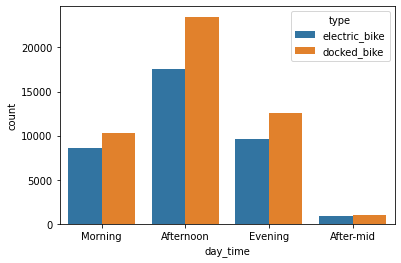

In [33]:
sb.countplot(data = data, x = 'day_time', hue = 'type');

same result for different day times

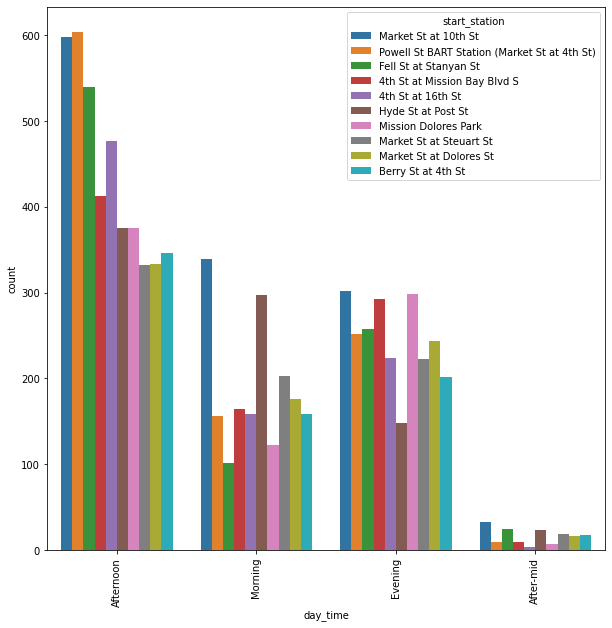

In [34]:
data_sub = data[data.start_station.isin(top_start_station)]
plt.figure(figsize = [10, 10])
sb.countplot(data = data_sub, x = 'day_time', hue = 'start_station', hue_order = top_start_station);
plt.xticks(rotation = 90);

Here, I am plotting the tom ten used starting points Vs different day times. I am not trying to prove anything here. But I believe that this figure is important to consider redistribution of bikes during the day times in order not to have one station that's uncapable of dealing with the customer needs

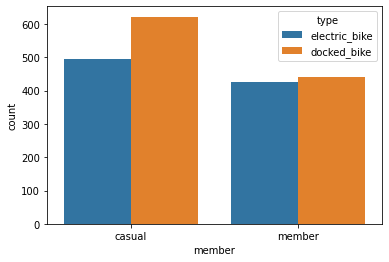

In [35]:
# Investigate users of the service after the midnight
data_sub = data[data.hour < 6]
sb.countplot(data = data_sub, x = 'member', hue = 'type');

Registered members are more likely to have electric bike after midnight

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The Average trip duration is higher form them than those registered members

> Despite the plot is wider for registered members (more trips), they are concentrated at < 20 mins.

> users of docked bikes are likely to have longer trip duration than those with electric bikes

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a relation between the membership type and the average trip duration

> Docked bikes are used more

> the top start stations obtained are dynamic Vs. Time

> Registered members are more likely to have electric bike after midnight

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

/home/abdelrahman/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/abdelrahman/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


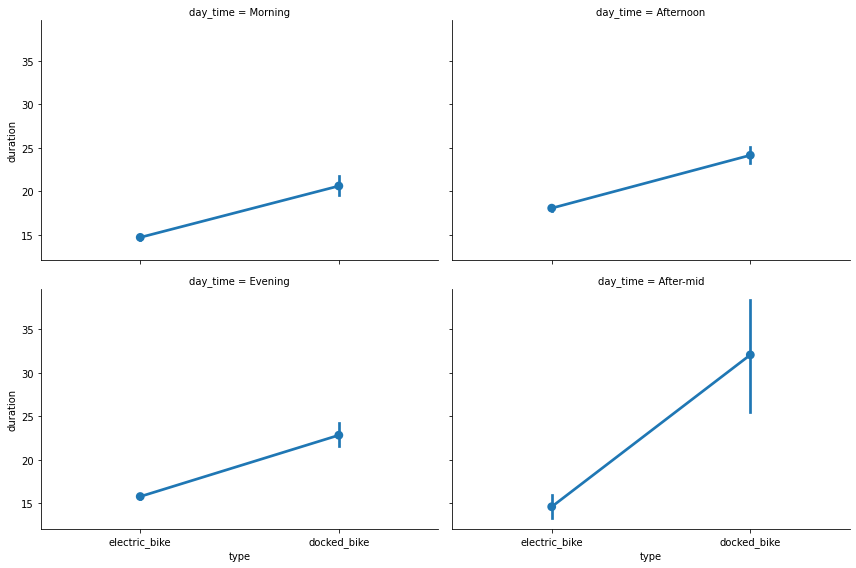

In [36]:
g = sb.FacetGrid(data = data, col = "day_time",col_wrap = 2, size = 4, aspect = 1.5)
g.map(sb.pointplot, 'type', 'duration');

Average trip durations of docked bikes is more than the electric ones. and the average duration of docked bikes after midnight is the largest but with high varaince

/home/abdelrahman/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/abdelrahman/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


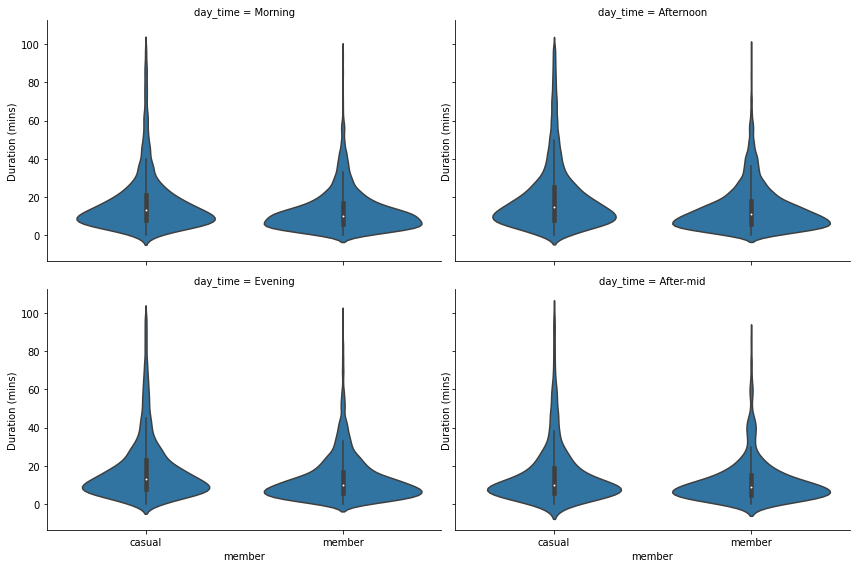

In [37]:
data_sub = data[data.duration < 100]
g = sb.FacetGrid(data = data_sub, col = "day_time", col_wrap = 2, size = 4, aspect = 1.5)
g.map(sb.violinplot, 'member', 'duration');
for ax in g.axes.flat:
    ax.set_ylabel("Duration (mins)");

Registered members behaviour is consistent Vs Day times. They tend to make more trips but short ones

/home/abdelrahman/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/abdelrahman/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


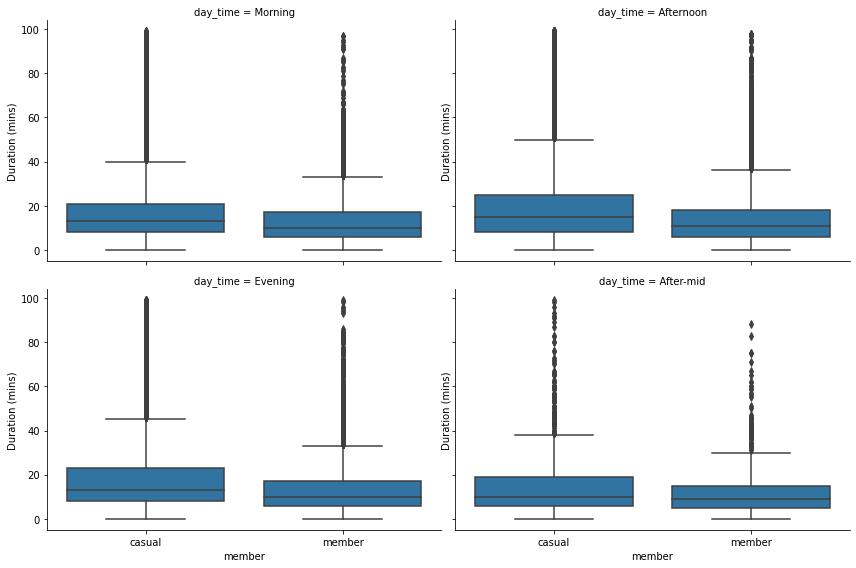

In [38]:
data_sub = data[data.duration < 100]
g = sb.FacetGrid(data = data_sub, col = "day_time", col_wrap = 2, size = 4, aspect = 1.5)
g.map(sb.boxplot, 'member', 'duration');
for ax in g.axes.flat:
    ax.set_ylabel("Duration (mins)");

Same Result obtained from the violin plot

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Average trip durations of docked bikes is more than the electric ones. and the average duration of docked bikes after midnight is the largest but with high varaince

> Registered members behaviour is consistent Vs Day times. They tend to make more trips but short ones

### Were there any interesting or surprising interactions between features?

> Nothing new! Results are consistent with previous ones